# 🎵 Spotify Songs EDA (2015–2025)

**Objective:**  
Analyze Spotify song data to understand popularity trends and relationships between audio features using advanced Seaborn visualizations.


## 📦 Import Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

## 📂 Load Dataset

In [2]:
df = pd.read_csv("E:/Kanchan/Projects/Data Analysis with Python/spotify_2015_2025_85k.csv")
df.head()

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,Pop,234194,55,0.15,0.74,9,-32.22,0,0.436,73.12,13000,Brazil,0,Universal Music
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,2022-04-15,Metal,375706,45,0.44,0.46,0,-14.02,0,0.223,157.74,1000,France,1,Island Records
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,Rock,289191,55,0.62,0.80,8,-48.26,1,0.584,71.03,1000,Germany,1,XL Recordings
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,2015-10-12,Pop,209484,51,0.78,0.98,1,-34.47,1,0.684,149.00,1000,France,0,Warner Music
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,2022-07-08,Indie,127435,39,0.74,0.18,10,-17.84,0,0.304,155.85,2000,United States,0,Independent


## 🔍 Initial Data Inspection
- Understand data shape and structure
- Identify column names and data types


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85000 entries, 0 to 84999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          85000 non-null  object 
 1   track_name        84979 non-null  object 
 2   artist_name       85000 non-null  object 
 3   album_name        84954 non-null  object 
 4   release_date      85000 non-null  object 
 5   genre             85000 non-null  object 
 6   duration_ms       85000 non-null  int64  
 7   popularity        85000 non-null  int64  
 8   danceability      85000 non-null  float64
 9   energy            85000 non-null  float64
 10  key               85000 non-null  int64  
 11  loudness          85000 non-null  float64
 12  mode              85000 non-null  int64  
 13  instrumentalness  85000 non-null  float64
 14  tempo             85000 non-null  float64
 15  stream_count      85000 non-null  int64  
 16  country           85000 non-null  object

## 🧹 Data Cleaning

In [4]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df = df.dropna(subset=['release_year', 'popularity'])

## 📊 Univariate Analysis
### Distribution of Song Popularity
**Insight:** Most songs fall into low-to-medium popularity range.


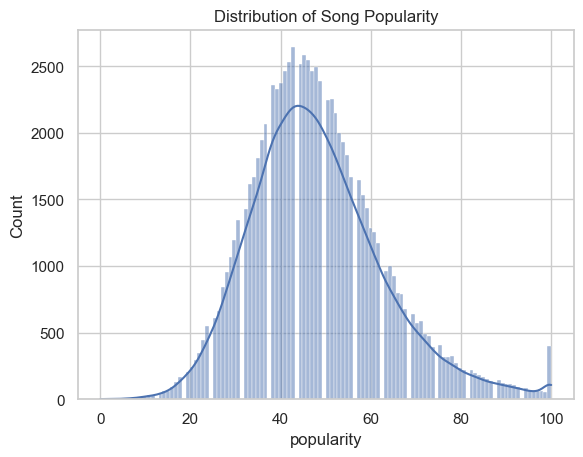

In [5]:
sns.histplot(df['popularity'], kde=True)
plt.title('Distribution of Song Popularity')
plt.show()

## 📈 Bivariate Analysis
### Danceability vs Popularity
**Insight:** More danceable songs tend to receive higher popularity.


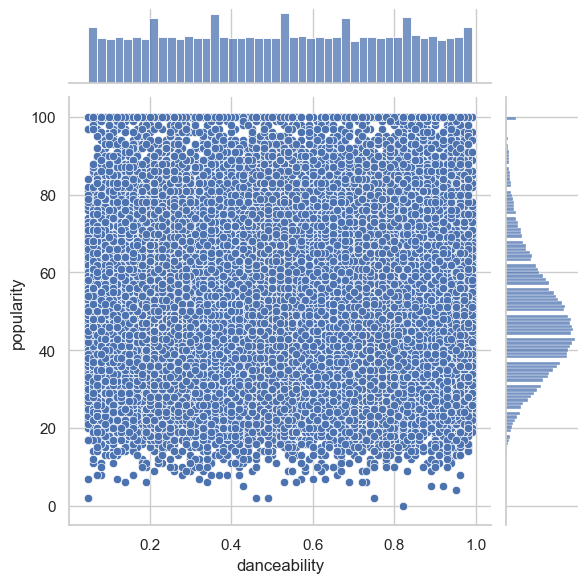

In [6]:
sns.jointplot(x='danceability', y='popularity', data=df)
plt.show()

## 🎻 Violin Plot
### Popularity by Explicit Content
**Insight:** Explicit songs show slightly higher median popularity.


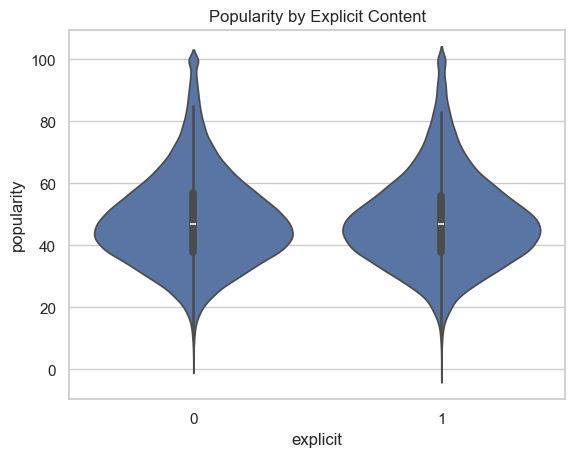

In [7]:
sns.violinplot(x='explicit', y='popularity', data=df)
plt.title('Popularity by Explicit Content')
plt.show()

## 🧩 FacetGrid Analysis
### Popularity Distribution Across Year Groups
**Insight:** Music popularity patterns change over time.


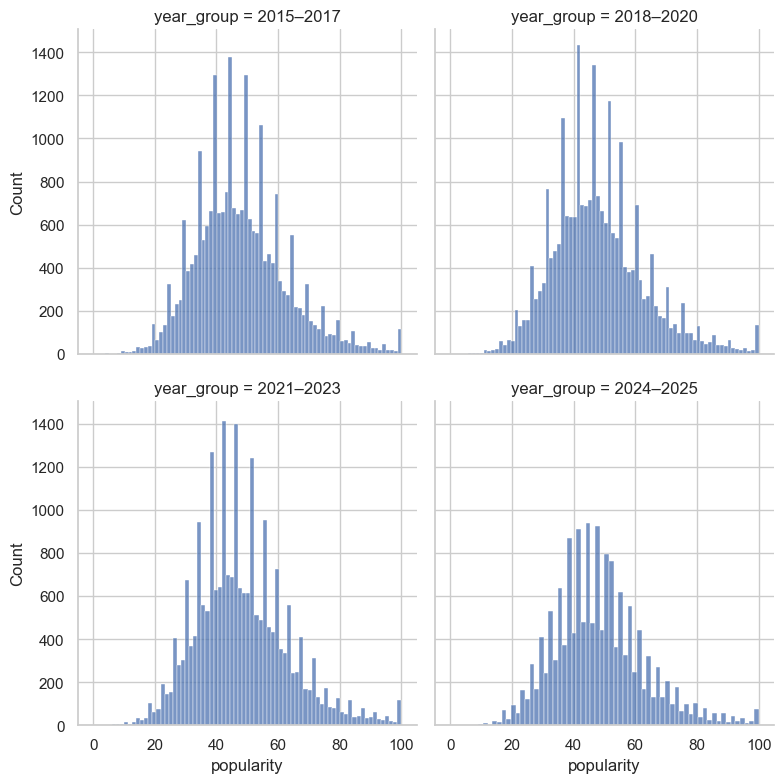

In [8]:
df['year_group'] = pd.cut(df['release_year'],bins=[2014, 2017, 2020, 2023, 2026],labels=['2015–2017', '2018–2020', '2021–2023', '2024–2025'])

g = sns.FacetGrid(df, col='year_group', col_wrap=2, height=4)
g.map(sns.histplot, 'popularity')
plt.show()

## 🔥 Correlation Heatmap
**Insight:** Energy & loudness show strong positive correlation.


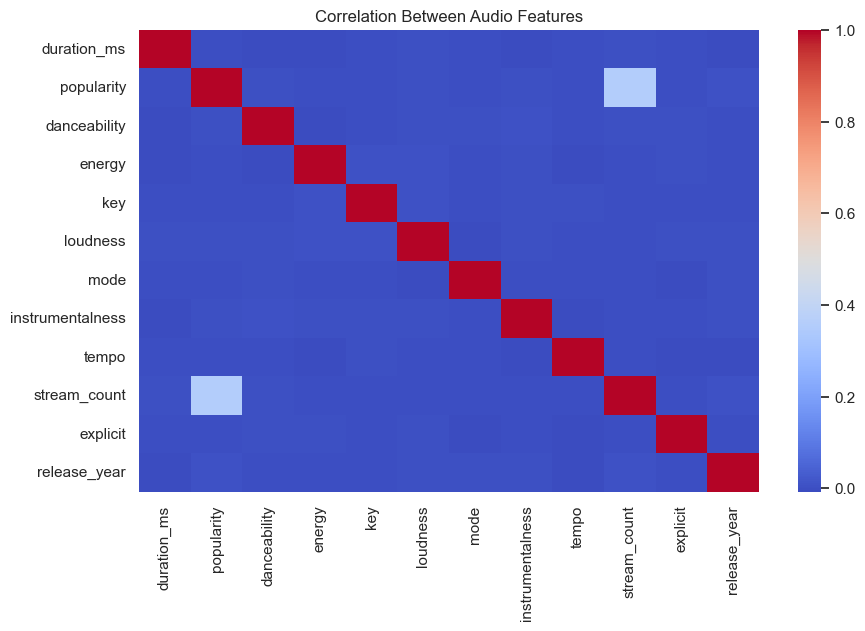

In [9]:
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Between Audio Features')
plt.show()